# Title: Microbes Classification
Notebook Author : Maryam Oyeyiola

Github : https://github.com/Olatohun

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
print('Done')

Done


# Data Exploration

In [2]:
train=pd.read_csv('microbes_train_dataset.csv')

In [3]:
train.shape

(21368, 26)

In [4]:
train.isnull().sum()

Serial No          0
Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
microorganisms     0
dtype: int64

In [5]:
train.describe()

,Serial No,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,...,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000,21368.000000
mean,15257.325908,9.700074,19.489904,3.637855,11.829647,0.420587,5.846141,11.777357,22.379627,10.877837,...,11.005289,10.980848,1.605573,1.013201,0.829936,0.255499,11.712323,11.597781,0.804587,5.220293
std,8808.215772,4.058715,3.463016,2.212756,6.045689,0.873546,3.256171,6.571021,0.941583,6.093468,...,6.088829,6.090648,1.673051,1.242217,1.143075,0.996407,6.031121,5.711966,1.170108,2.802506
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7619.500000,6.590000,17.400000,2.170000,6.720000,0.093675,3.300000,6.080000,22.200000,5.660000,...,5.730000,5.720000,0.635000,0.420000,0.252750,0.034700,6.560000,7.110000,0.215000,3.110000
50%,15247.500000,9.360000,20.700000,3.380000,12.000000,0.230000,5.260000,12.100000,22.600000,10.900000,...,11.000000,11.000000,1.170000,0.744000,0.519000,0.085900,12.000000,11.200000,0.514000,5.320000
75%,22905.250000,12.600000,22.200000,4.602500,17.100000,0.438000,7.850000,17.200000,22.900000,15.800000,...,15.900000,15.800000,2.070000,1.220000,0.967000,0.201000,16.900000,16.200000,0.943000,7.050000
max,30525.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000


In [6]:
train.dtypes

Serial No            int64
Solidity           float64
Eccentricity       float64
EquivDiameter      float64
Extrema            float64
FilledArea         float64
Extent             float64
Orientation        float64
EulerNumber        float64
BoundingBox1       float64
BoundingBox2       float64
BoundingBox3       float64
BoundingBox4       float64
ConvexHull1        float64
ConvexHull2        float64
ConvexHull3        float64
ConvexHull4        float64
MajorAxisLength    float64
MinorAxisLength    float64
Perimeter          float64
ConvexArea         float64
Centroid1          float64
Centroid2          float64
Area               float64
raddi              float64
microorganisms      object
dtype: object

In [7]:
train.microorganisms.nunique()

10

In [8]:
train.microorganisms.value_counts()

Ulothrix          5194
Volvox            3024
Protozoa          2721
Aspergillus sp    2721
Yeast             2520
Raizopus          1786
Diatom            1273
Pithophora         945
Penicillum         756
Spirogyra          428
Name: microorganisms, dtype: int64

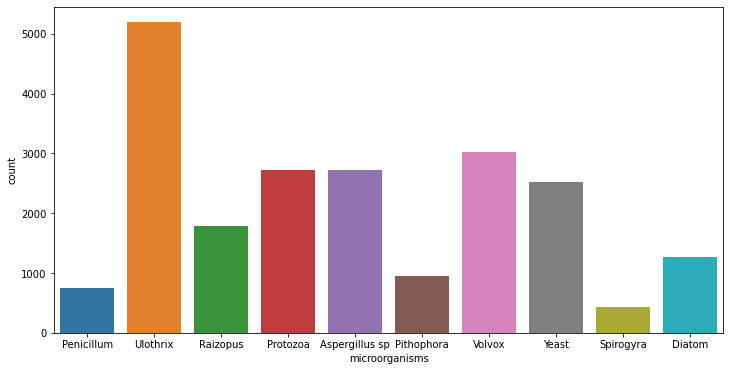

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(train.microorganisms)
plt.show()

In [10]:
le = LabelEncoder()
train['Labels']= le.fit_transform(train['microorganisms'])

In [11]:
train.Labels.unique()

array([2, 7, 5, 4, 0, 3, 8, 9, 6, 1])

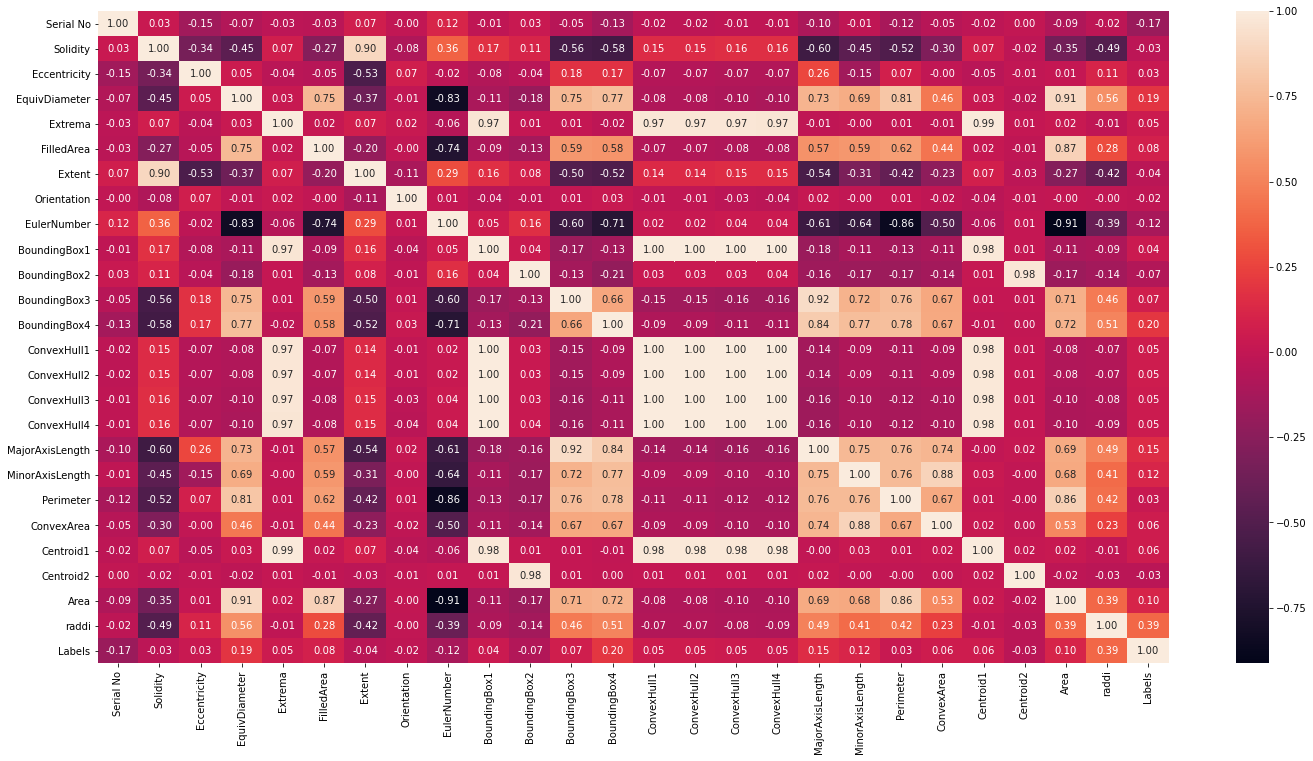

In [12]:
plt.figure(figsize = (24,12))
sns.heatmap(train.corr(), annot=True, fmt=".2f");

# feature selection

In [13]:
train.columns

Index(['Serial No', 'Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema',
       'FilledArea', 'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1',
       'BoundingBox2', 'BoundingBox3', 'BoundingBox4', 'ConvexHull1',
       'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'MajorAxisLength',
       'MinorAxisLength', 'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2',
       'Area', 'raddi', 'microorganisms', 'Labels'],
      dtype='object')

In [14]:
X = train.drop(['Serial No','Solidity','Extent', 'Orientation', 
                'EulerNumber','BoundingBox2','Centroid2',
                'microorganisms', 'Labels'],axis=1)
y=train.Labels

In [15]:
# selecting featues that are negatively correlated with target
X0=train[['Solidity','Extent', 'Orientation', 'EulerNumber','BoundingBox2','Centroid2']]

In [16]:
# importing scikit modules

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import multilabel_confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [17]:
# split data

# set 1 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# set 2
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y, test_size=0.3, random_state=0)

In [18]:
print((X_train.shape), (X_test.shape), (y_train.shape), (y_test.shape))

(14957, 18) (6411, 18) (14957,) (6411,)


In [19]:
print((X0_train.shape), (X0_test.shape), (y0_train.shape), (y0_test.shape))

(14957, 6) (6411, 6) (14957,) (6411,)


In [20]:
# Using all the features
rf =RandomForestClassifier()
rf.fit(X_train, y_train)

preds = rf.predict(X_test)

print('Set 1')
print('The accuracy score for set 1 => {acc}%'.format(acc=round(accuracy_score(y_test,preds)*100)))

Set 1
The accuracy score for set 1 => 97%


In [21]:
# classification report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       811
           1       0.93      0.96      0.94       387
           2       0.98      1.00      0.99       229
           3       0.99      0.80      0.88       282
           4       0.99      1.00      1.00       802
           5       1.00      1.00      1.00       534
           6       0.99      0.79      0.88       117
           7       0.96      0.97      0.96      1551
           8       0.96      0.99      0.97       943
           9       0.97      0.99      0.98       755

    accuracy                           0.97      6411
   macro avg       0.97      0.94      0.95      6411
weighted avg       0.97      0.97      0.97      6411



In [22]:
# negative correlation set

rf2 = RandomForestClassifier()
rf2.fit(X0_train, y0_train)

preds2 = rf2.predict(X0_test)

print('Set 2')
print('The accuracy score for set 2 => {acc}%'.format(acc=round(accuracy_score(y0_test,preds2)*100)))

Set 2
The accuracy score for set 2 => 96%


In [23]:
# classification report
print(classification_report(y0_test,preds2))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       811
           1       0.92      0.96      0.94       387
           2       0.97      1.00      0.98       229
           3       0.98      0.79      0.88       282
           4       0.99      1.00      0.99       802
           5       0.99      1.00      1.00       534
           6       1.00      0.79      0.89       117
           7       0.95      0.95      0.95      1551
           8       0.94      0.99      0.97       943
           9       0.95      0.97      0.96       755

    accuracy                           0.96      6411
   macro avg       0.97      0.94      0.95      6411
weighted avg       0.96      0.96      0.96      6411



Summary of results

I experimented with the idea that features that are negatively correlated with the target can produce an acceptable accuracy result upon prediction. It worked. Using all the features for predictions was approximately a percentage higher with an accuracy of 97% compared to using the negative correlation features which had an accuracy of 96%. Both set of features were run on the same algorithm (Random Forest Classifier) and as shown in the classification report, the numbers are very close.

# Next: predict the testing dataset

In [31]:
test=pd.read_csv('microbes_test_dataset.csv')

In [32]:
test_data = test.copy()

In [33]:
test.isnull().sum()

Serial No          0
Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
dtype: int64

In [34]:
test.columns

Index(['Serial No', 'Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema',
       'FilledArea', 'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1',
       'BoundingBox2', 'BoundingBox3', 'BoundingBox4', 'ConvexHull1',
       'ConvexHull2', 'ConvexHull3', 'ConvexHull4', 'MajorAxisLength',
       'MinorAxisLength', 'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2',
       'Area', 'raddi'],
      dtype='object')

In [35]:
test=test.drop(['Serial No','Solidity','Extent', 'Orientation', 
                'EulerNumber','BoundingBox2','Centroid2'],axis=1)

In [36]:
# predict test dataset

test_predictions = rf.predict(test)

In [37]:
train2=pd.read_csv('microbes_train_dataset.csv')

# return the original labels
label=list(train2.microorganisms.unique())
test_label =[label[i] for i in test_predictions]

In [38]:
Serial_No = test_data['Serial No']
df=pd.DataFrame({"Serial No": Serial_No, 
                 "Microorganisms": test_label})

In [39]:
df

,Serial No,Microorganisms
0,22885,Ulothrix
1,19703,Aspergillus sp
2,27194,Yeast
3,4687,Spirogyra
4,17886,Aspergillus sp
...,...,...
9154,20303,Aspergillus sp
9155,9799,Diatom
9156,7250,Diatom
9157,5162,Yeast


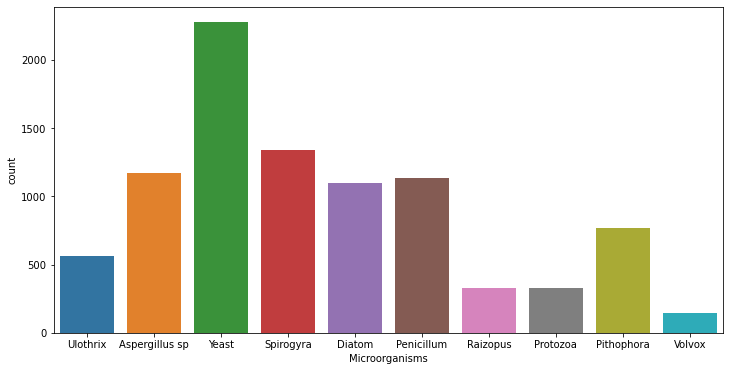

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(df.Microorganisms)
plt.show()

In [42]:
df.to_csv('microbes_predictions.csv', index=False)